After clustering your data and plotting a dendrogram, you probably want to **compare** the **structure** you get with your **expectations**. You can make this comparison by coloring labels according to your expectation.   
In this example, mtcars dataset is used. It is a numeric matrix that gives the features of cars. We can **cluster** these cars, and represent their **structure** in a group by using the `dendrogram()` function of the scipy library of python. In the example, you will see how to color the labels(car names) according to their **cylinder**(the ‘cyl’ column). By coloring according to cylinder feature, it is possible to see visually if the cylinder is responsible of this structure!

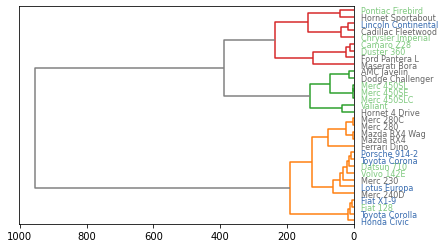

In [1]:
# Libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
 
# Data set
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
 
# Calculate the distance between each sample
Z = linkage(df, 'ward')
 
# Make the dendrogram
dendrogram(Z, labels=df.index, leaf_rotation=0, orientation="left", color_threshold=240, above_threshold_color='grey')
 
# Create a color palette with 3 colors for the 3 cyl possibilities
my_palette = plt.cm.get_cmap("Accent", 3)
 
# transforme the 'cyl' column in a categorical variable. It will allow to put one color on each level.
df['cyl']=pd.Categorical(df['cyl'])
my_color=df['cyl'].cat.codes
 
# Apply the right color to each label
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
num=-1
for lbl in xlbls:
    num+=1
    val=my_color[num]
    lbl.set_color(my_palette(val))

# Show the graph
plt.show()